In [1]:
#Classifying Fashion MNIST images

In [3]:
!pip install -U tensorflow

     -------------------------------------- 272.8/272.8 MB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 14.7/14.7 MB 9.5 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 9.5 MB/s eta 0:00:00
  Using cached tensorboard-2.12.0-py3-none-any.whl (5.6 MB)
  Using cached termcolor-2.2.0-py3-none-any.whl (6.6 kB)
     ---------------------------------------- 1.5/1.5 MB 10.5 MB/s eta 0:00:00
  Using cached libclang-16.0.0-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached flatbuffers-23.3.3-py2.py3-none-any.whl (26 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using cached jax-0.4.6.tar.gz (1.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached opt_einsum-3.3.0-py3-none-any.whl (

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.23.5 which is incompatible.


In [27]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os

In [28]:
fashion_mnist = keras.datasets.fashion_mnist

In [29]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [30]:
X_train_full.shape

(60000, 28, 28)

In [31]:
X_train_full.dtype

dtype('uint8')

In [32]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [33]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [34]:
class_names[y_train[0]]

'Coat'

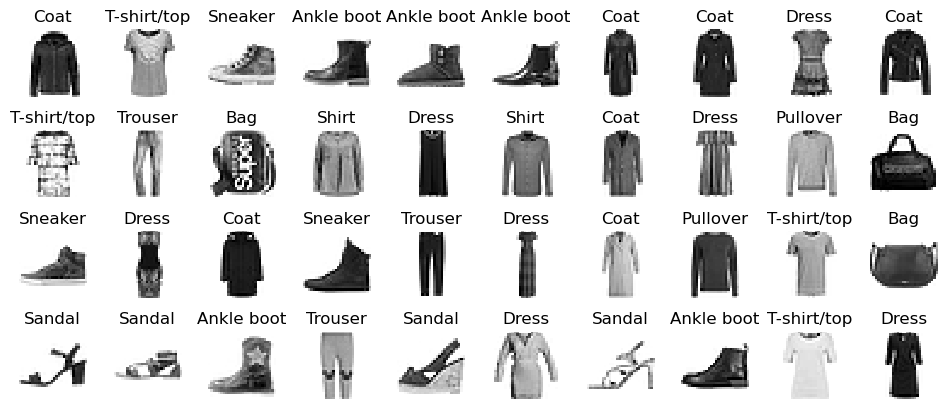

In [37]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [ ]:
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# model.add(keras.layers.Dense(300, activation="relu"))
# model.add(keras.layers.Dense(100, activation="relu"))
# model.add(keras.layers.Dense(10, activation="softmax"))

# OR 

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
]) 

In [ ]:
model.summary()

In [ ]:
model.layers

In [ ]:
hidden1 = model.layers[0]
hidden1.name

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
             metrics=["accuracy"])

In [15]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 5ms/step - loss: 0.7169 - accuracy: 0.7593 - val_loss: 0.5237 - val_accuracy: 0.8178
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4883 - accuracy: 0.8307 - val_loss: 0.4456 - val_accuracy: 0.8456
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4415 - accuracy: 0.8460 - val_loss: 0.4211 - val_accuracy: 0.8564
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4146 - accuracy: 0.8543 - val_loss: 0.4201 - val_accuracy: 0.8480
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3938 - accuracy: 0.8607 - val_loss: 0.3787 - val_accuracy: 0.8682
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3781 - accuracy: 0.8659 - val_loss: 0.3643 - val_accuracy: 0.8756
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3645 - accuracy: 0.8722 - val_loss: 0.3604 - val_accuracy

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

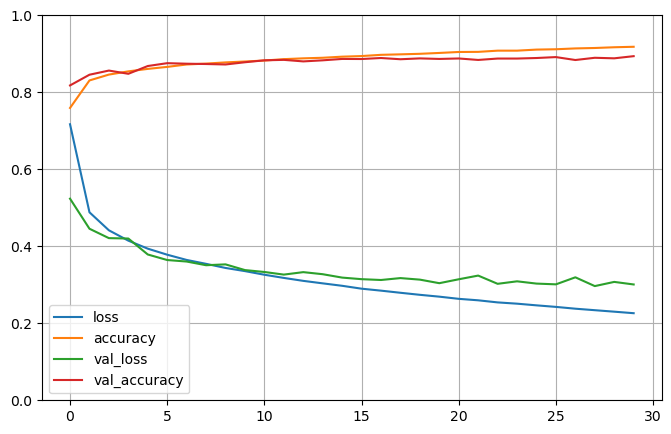

In [19]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 63.9560 - accuracy: 0.8479


[63.955955505371094, 0.8478999733924866]

In [29]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba

1/1 [==============================] - 0s 50ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)